In [1]:
import os
os.chdir("/home/giacomo/Documenti/GitHub/RAG-with-LLamaIndex-Open/src")
cwd = os.getcwd()

print(cwd)

/home/giacomo/Documenti/GitHub/RAG-with-LLamaIndex-Open/src


In [2]:
from pdf_parser import chunk_splitter, extract_layout, pdf_ingestion
text,tables  = chunk_splitter.get_documents(path = '/home/giacomo/Documenti/GitHub/RAG-with-LLamaIndex-Open/docs/bandi')

/home/giacomo/Documenti/GitHub/RAG-with-LLamaIndex-Open/py310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/giacomo/Documenti/GitHub/RAG-with-LLamaIndex-Open/py310/lib/python3.10/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
mar 21, 2024 6:00:34 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
AVVERTENZA: Using fallback font 'LiberationSans' for 'TimesNewRomanPSMT'
mar 21, 2024 6:00:35 PM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
AVVERTENZA: Using fallback font 'LiberationSans' for 'TimesNewRomanPSMT'
mar 21, 2024 6:00:35 PM org.apache.pdfbox

In [3]:
print(tables[1][2])

| Unnamed: 0               | Unnamed: 1                                                        | Unnamed: 2                                                  | Unnamed: 3        | Unnamed: 4   | Unnamed: 5             | Unnamed: 6     | Unnamed: 7   | Unnamed: 8   | Unnamed: 9   |
|:-------------------------|:------------------------------------------------------------------|:------------------------------------------------------------|:------------------|:-------------|:-----------------------|:---------------|:-------------|:-------------|:-------------|
| Operazioni finanziabili  | Con il                                                            | presente                                                    | Avviso            | si           | finanziano             | percorsi       | di           | Istruzione   | e            |
|                          | Formazione Tecnica Superiore (IFTS) di cui al DPCM 25 gennaio     |                                                             

In [4]:
text[0]

Document(id_='69acf2ea-3520-4545-8b10-0541ad174588', embedding=None, metadata={'source': 'Scheda RED 2020.pdf'}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, text='19 giugno 2020 Pag 1 di 3 Centro Servizi Sistema Puglia www.sistema.puglia.it COMUNICATO STAMPA Approvato il nuovo Avviso pubblico per il Reddito di Dignità pugliese post Covid. Ampliata la platea dei beneficiari ed aumentato l’importo del contributo, che viene fissato a 500 euro al mese per 12 mesi. Parte il nuovo ReD dell’emergenza post Covid, per tutte le persone e le famiglie pugliesi in condizioni di fragilità economica. La sezione Inclusione Sociale Attiva ed Innovazione delle Reti Sociali della Regione Puglia ha approvato oggi con atto dirigenziale il nuovo Avviso, in fase di pubblicazione sul bollettino ufficiale della Regione, che stabilisce le modalità e i requisiti della misura. Da lunedì 29 giugno, dalle ore 14,00 sarà possibile per tutti i cittadini presentare la domanda regi

In [5]:

print(len(text))

300


In [ ]:
from retrieval import embeddings 

embed_model = embeddings.getEmbeddingModel(name = "intfloat/multilingual-e5-large-instruct")
nodes = embeddings.createEmbeddings(text, embed_model)


In [7]:
embed_model

HuggingFaceEmbedding(model_name='intfloat/multilingual-e5-large-instruct', embed_batch_size=10, callback_manager=<llama_index.core.callbacks.base.CallbackManager object at 0x7b28cb766c80>, tokenizer_name='intfloat/multilingual-e5-large-instruct', max_length=512, pooling=<Pooling.CLS: 'cls'>, normalize=True, query_instruction=None, text_instruction=None, cache_folder=None)

In [8]:
from retrieval import vector_stores

vector_store = vector_stores.setupAstradb(nodes = nodes, embeddings_dim = 1024, collection_name = 'test1')

In [9]:
print(len(nodes[0].embedding))

1024


In [10]:
print(vector_store)

stores_text=True is_embedding_query=True flat_metadata=True


In [11]:
from retrieval import  retriever
vector_db_retriever_instance = retriever.VectorDBRetriever(vector_store=vector_store, 
                                                               embed_model=embed_model, 
                                                               similarity_top_k=3)    
        
query_engine = retriever.get_query_engine(vector_db_retriever_instance, model_path='./model/mistral-Ita-7b-q5_k_m.gguf')

llama_model_loader: loaded meta data with 20 key-value pairs and 291 tensors from ./model/mistral-Ita-7b-q5_k_m.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = mistral
llama_model_loader: - kv   2:                       llama.context_length u32              = 32768
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 14336
llama_model_loader: - kv   6:                 llama.rope.dimension_count u32              = 128
llama_model_loader: - kv   7:                 llama.attention.head_count u32

In [12]:
query_str= ("Quali sono i bandi relativi all'offerta formativa 2023?")

response = retriever.get_response_italian(query_str,query_engine)

print(str(response))


llama_print_timings:        load time =   19093.31 ms
llama_print_timings:      sample time =     128.51 ms /   256 runs   (    0.50 ms per token,  1992.05 tokens per second)
llama_print_timings: prompt eval time =   19093.02 ms /   118 tokens (  161.81 ms per token,     6.18 tokens per second)
llama_print_timings:        eval time =   88262.73 ms /   255 runs   (  346.13 ms per token,     2.89 tokens per second)
llama_print_timings:       total time =  108236.18 ms /   373 tokens


1) L'Università di Roma ha bandito per l'offerta formativa 2023 per gli studenti di tutte le classi. 2) L'Università di Milano ha bandito per l'offerta formativa 2023 per gli studenti di tutte le classi. 3) L'Università di Napoli ha bandito per l'offerta formativa 2023 per gli studenti di tutte le classi. 4) L'Università di Torino ha bandito per l'offerta formativa 2023 per gli studenti di tutte le classi.

1) L'Università di Roma ha bandito per l'offerta formativa 2023 per gli studenti di tutte le classi. 2) L'Università di Milano ha bandito per l'offerta formativa 2023 per gli studenti di tutte le classi. 3) L'Università di Napoli ha bandito per l'offerta formativa 2023 per gli studenti di tutte le classi. 4) L'Univers


In [3]:
import src.pdf_ingestion as pdf_ingestion
import os

folder_path = '.\Docs'
pdf_files = [f for f in os.listdir(folder_path) if f.endswith('.pdf')]

chunks = []

for pdf_file in pdf_files:
    full_path = os.path.join(folder_path, pdf_file)
    print(pdf_file)
    text = pdf_ingestion.replace_tables_in_text(full_path)
    chunks.append(text)

ModuleNotFoundError: No module named 'doc_ingestion'

In [27]:
chunks

[['Llama 2: Open Foundation and Fine-Tuned Chat Models Hugo Touvron∗ Louis Martin† Kevin Stone† Peter Albert Amjad Almahairi Yasmine Babaei Nikolay Bashlykov Soumya Batra Prajjwal Bhargava Shruti Bhosale Dan Bikel Lukas Blecher Cristian Canton Ferrer Moya Chen Guillem Cucurull David Esiobu Jude Fernandes Jeremy Fu Wenyin Fu Brian Fuller Cynthia Gao Vedanuj Goswami Naman Goyal Anthony Hartshorn Saghar Hosseini Rui Hou Hakan Inan Marcin Kardas Viktor Kerkez Madian Khabsa Isabel Kloumann Artem Korenev Punit Singh Koura Marie-Anne Lachaux Thibaut Lavril Jenya Lee Diana Liskovich Yinghai Lu Yuning Mao Xavier Martinet Todor Mihaylov Pushkar Mishra Igor Molybog Yixin Nie Andrew Poulton Jeremy Reizenstein Rashi Rungta Kalyan Saladi Alan Schelten Ruan Silva Eric Michael Smith Ranjan Subramanian Xiaoqing Ellen Tan Binh Tang Ross Taylor Adina Williams Jian Xiang Kuan Puxin Xu Zheng Yan Iliyan Zarov Yuchen Zhang Angela Fan Melanie Kambadur Sharan Narang Aurelien Rodriguez Robert Stojnic Sergey Edu

In [ ]:

from llama_index.core import Document
import src.chunk_splitter as chunk_splitter
from llama_index.core.node_parser import SentenceSplitter
import os

chunks_splitted = []

for chunk in chunks:
    for text in chunk:
        print(f'text unsplitted : {text}')
        chunk_splitted = chunk_splitter.custom_chunker(text)
        print(len(chunk_splitted))
        if len(chunk_splitted) > 1:
            print(f'lunghezza {len(chunk_splitted[0])} text splitted : {chunk_splitted}')
        chunks_splitted.extend(chunk_splitted)


documents = [Document(text=text) for text in chunks_splitted]

In [2]:
import src.chunk_splitter as chunk_splitter

documents,tables_md = chunk_splitter.get_documents(max_len=1024)

/home/giac/RAG-with-LLamaIndex-Open/py310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
The checkpoint state_dict contains keys that are not used by the model:
  pixel_mean
  pixel_std


Freelance_Developer_CV.pdf


/home/giac/RAG-with-LLamaIndex-Open/py310/lib/python3.10/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


1
no tables
2
no tables
Longitudinal Data Analysis - Master of Science in Biostatistics by Slidesgo.pdf
1
no tables
2
Errore nell'estrazione della tabella: Error failed to create DataFrame with different column tables.
Try to set `multiple_tables=True`or set `names` option for `pandas_options`. 
, caused by ParserError('Error tokenizing data. C error: Expected 1 fields in line 3, saw 2\n'). Procedo con l'estrazione solo del testo.
3
no tables
4
no tables
5
no tables
6
no tables
7
no tables
8
no tables
9
no tables
10
no tables
11
no tables
12
no tables
13
no tables
14
no tables
15
no tables
16
no tables
17
no tables
18
no tables
19
no tables
20
no tables
21
no tables
22
no tables
23
no tables
24
no tables
25
no tables
26
no tables
27
no tables
28
29
no tables
30
no tables
31
no tables
32
no tables
33
no tables
34
no tables
35
no tables
36
no tables
37
no tables
38
no tables
39
no tables
40
no tables
41
no tables
42
no tables
43
no tables
44
no tables
45
no tables
46
no tables
47
no tabl

Mar 04, 2024 11:32:11 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Mar 04, 2024 11:32:11 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Mar 04, 2024 11:32:11 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Mar 04, 2024 11:32:11 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Mar 04, 2024 11:32:11 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Mar 04, 2024 11:32:11 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Mar 04, 2024 11:32:11 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Mar 04, 2024 11:32:11 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Mar 04, 2024 11:32:11 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Mar 04, 2024 11:32:11 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Mar 04, 2024 11:32:11 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Mar 04, 2024 11:32:11 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Mar 04, 2024 11:32:11 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Mar 04, 2024 11:32:11 AM 

7
8
9
10
no tables
11
12
13
no tables
14
no tables
15
no tables
16
no tables
17
no tables
18
no tables
19
no tables
20
no tables
21
22
23
24
no tables
25
no tables
26
no tables
27
28
no tables
29
no tables
30
no tables
31
32
no tables
33
no tables
34
35
no tables
36
no tables
37
no tables
38
no tables
39
no tables
40
no tables
41
no tables
42
no tables
43
no tables
44
no tables
45
no tables
46
no tables
47
48
49
50
51
52
53
54
55
no tables
56
57
58
no tables
59
60
no tables
61
62
63
64
no tables
65
no tables
66
67
68
no tables
69
no tables
70
71
72
73
74
75
no tables
76
77
Fine-Tuning-pdf.pdf
1
no tables
2
no tables
3
no tables
4
no tables
5
no tables
6


Mar 04, 2024 11:36:21 AM org.apache.pdfbox.pdmodel.font.PDSimpleFont toUnicode
Mar 04, 2024 11:36:21 AM org.apache.pdfbox.pdmodel.font.PDSimpleFont toUnicode
Mar 04, 2024 11:36:21 AM org.apache.pdfbox.pdmodel.font.PDSimpleFont toUnicode
Mar 04, 2024 11:36:21 AM org.apache.pdfbox.pdmodel.font.PDSimpleFont toUnicode
Mar 04, 2024 11:36:21 AM org.apache.pdfbox.pdmodel.font.PDSimpleFont toUnicode
Mar 04, 2024 11:36:21 AM org.apache.pdfbox.pdmodel.font.PDSimpleFont toUnicode
Mar 04, 2024 11:36:21 AM org.apache.pdfbox.pdmodel.font.PDSimpleFont toUnicode
Mar 04, 2024 11:36:21 AM org.apache.pdfbox.pdmodel.font.PDSimpleFont toUnicode


7
8
9
10
no tables
11
no tables
Invoice.pdf
1
no tables
EsamiVari_TIZIO_CAIO_5678.pdf
1
no tables
Tesi_Giacomo_Signorile (6).pdf
1
no tables
2
no tables
3
no tables
4
no tables
5
no tables
6
no tables
7
no tables
8
no tables
9
no tables
10
no tables
11
no tables
12
no tables
13
no tables
14
no tables
15
no tables
16
no tables
17
no tables
18
no tables
19
no tables
20
no tables
21
no tables
22
no tables
23
no tables
24
no tables
25
no tables
26
no tables
27
no tables
28
no tables
29
no tables
30
no tables
31
no tables
32
no tables
33
no tables
34
no tables
35
no tables
36
no tables
37
no tables
38
no tables
39
no tables
40
no tables
41
no tables
42
no tables
43
no tables
44
no tables
45
no tables
46
no tables
47
no tables
48
no tables
49
no tables
50
no tables
51
52
53
no tables
54
no tables
55
56
no tables
57
no tables
58
no tables
59
no tables
60
no tables
61
no tables
62
no tables
63
no tables
64
no tables
65
no tables
66
no tables
67
no tables
68
no tables
69
no tables
70
no tables


In [7]:
import pytesseract
img
print(pytesseract.get_languages())

['eng', 'osd']


In [3]:
documents

[Document(id_='3e953d32-688d-4bcd-a4b0-0d35652f29c9', embedding=None, metadata={}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, text='o Hands-on experience in executing Responsive Web Design (RWD) principles (Fluid grids, Flexible Images, Media Queries). o Familiar with UML modeling. o Familiar with developing applications on the WPF framework and coding in C#, XAML. o Sound knowledge of Flash Compression techniques and file structuring practices. o Exceptional knowledge of Flash animation techniques using both the timeline and programmatic motion. o Deep knowledge of encoding audio and video within Flash. o Huge knowledge of JavaScript, jQuery, jQuery UI, AJAX, DOM manipulation, and CSS selectors. o Proficient in understanding of how to build for mobile and tablets. o Proficient in understanding of version control (a.k.a GitHub). o Immense ability to write highly performing, accessible front-end code. o Extreme ability to create quick prototypes to

In [10]:
print(len(documents))

708


In [6]:
from llama_index.core.schema import TextNode

nodes = []
for idx, text_chunk in enumerate(documents):
    node = TextNode(
        text=text_chunk.text,
    )
    # src_doc = documents[doc_idxs[idx]]
    # node.metadata = src_doc.metadata
    nodes.append(node)

In [7]:
nodes

[TextNode(id_='e71baa64-9f16-43ea-9944-8de498269b46', embedding=None, metadata={}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, text='Llama 2: Open Foundation and Fine-Tuned Chat Models Hugo Touvron∗ Louis Martin† Kevin Stone† Peter Albert Amjad Almahairi Yasmine Babaei Nikolay Bashlykov Soumya Batra Prajjwal Bhargava Shruti Bhosale Dan Bikel Lukas Blecher Cristian Canton Ferrer Moya Chen Guillem Cucurull David Esiobu Jude Fernandes Jeremy Fu Wenyin Fu Brian Fuller Cynthia Gao Vedanuj Goswami Naman Goyal Anthony Hartshorn Saghar Hosseini Rui Hou Hakan Inan Marcin Kardas Viktor Kerkez Madian Khabsa Isabel Kloumann Artem Korenev Punit Singh Koura Marie-Anne Lachaux Thibaut Lavril Jenya Lee Diana Liskovich Yinghai Lu Yuning Mao Xavier Martinet Todor Mihaylov Pushkar Mishra Igor Molybog Yixin Nie Andrew Poulton Jeremy Reizenstein Rashi Rungta Kalyan Saladi Alan Schelten Ruan Silva Eric Michael Smith Ranjan Subramanian Xiaoqing Ellen Tan Binh Tang Ross T

In [6]:
# sentence transformers
from llama_index.embeddings.huggingface import HuggingFaceEmbedding

embed_model = HuggingFaceEmbedding(model_name="intfloat/multilingual-e5-large-instruct")

In [33]:
# # sentence transformers
# from llama_index.embeddings.huggingface import HuggingFaceEmbedding

# embed_model = HuggingFaceEmbedding(model_name="sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")

config.json: 100%|██████████| 645/645 [00:00<00:00, 646kB/s]
c:\Users\SIGNORILEG\OneDrive - Links S.p.A\Documenti\GitHub\RAG-with-LLamaIndex-Open\.venv\lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\SIGNORILEG\AppData\Local\llama_index\models--sentence-transformers--paraphrase-multilingual-MiniLM-L12-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enabl

In [5]:
# sentence transformers
from llama_index.embeddings.huggingface import HuggingFaceEmbedding

embed_model = HuggingFaceEmbedding(model_name="nickprock/sentence-bert-base-italian-uncased")

config.json: 100%|██████████| 637/637 [00:00<?, ?B/s] 
c:\Users\SIGNORILEG\OneDrive - Links S.p.A\Documenti\GitHub\RAG-with-LLamaIndex-Open\.venv\lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\SIGNORILEG\AppData\Local\llama_index\models--nickprock--sentence-bert-base-italian-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-dev

https://github.com/run-llama/llama_index/issues/9272

In [8]:
# sentence transformers
from llama_index.embeddings.huggingface import HuggingFaceEmbedding

# embed_model = HuggingFaceEmbedding(model_name="intfloat/multilingual-e5-large-instruct", max_length=512)


for node in nodes:
    node_embedding = embed_model.get_text_embedding(
        node.get_content(metadata_mode="all")
    )
    node.embedding = node_embedding

In [14]:
!python -m pip install chromadb

     ---------------------------------------- 0.0/525.5 kB ? eta -:--:--
     ---- ---------------------------------- 61.4/525.5 kB 1.7 MB/s eta 0:00:01
     -------------------- ----------------- 286.7/525.5 kB 3.5 MB/s eta 0:00:01
     -------------------------------------  522.2/525.5 kB 3.7 MB/s eta 0:00:01
     -------------------------------------- 525.5/525.5 kB 3.3 MB/s eta 0:00:00
  Using cached typer-0.9.0-py3-none-any.whl (45 kB)
     ---------------------------------------- 0.0/41.2 kB ? eta -:--:--
     ---------------------------------------- 41.2/41.2 kB ? eta 0:00:00
  Using cached mmh3-4.1.0-cp310-cp310-win_amd64.whl (31 kB)
     ---------------------------------------- 0.0/5.6 MB ? eta -:--:--
     --- ------------------------------------ 0.5/5.6 MB 34.1 MB/s eta 0:00:01
     ------ --------------------------------- 0.9/5.6 MB 13.7 MB/s eta 0:00:01
     ----------- ---------------------------- 1.6/5.6 MB 14.5 MB/s eta 0:00:01
     -------------- ----------------------


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
print(len(nodes[0].embedding))

768


In [7]:
import chromadb
from llama_index.vector_stores.chroma import ChromaVectorStore

# Your existing code to create ChromaDB client and vector store
# chroma_client = chromadb.EphemeralClient()
chroma_client = chromadb.PersistentClient(path="./VectorStore")
chroma_collection = chroma_client.get_collection("rag2-test")
vector_store = ChromaVectorStore(chroma_collection=chroma_collection)





ValueError: Collection rag2-test does not exist.

In [11]:
print(len(nodes))

447


In [32]:
import tiktoken

tokenizer = tiktoken.get_encoding('cl100k_base')

# create the length function
def tiktoken_len(text):
    tokens = tokenizer.encode(
        text,
        disallowed_special=()
    )
    return len(tokens)


token_counts = [tiktoken_len(page) for doc in chunks for page in doc]

In [33]:
print(f"""Min: {min(token_counts)}
Avg: {int(sum(token_counts) / len(token_counts))}
Max: {max(token_counts)}""")

Min: 0
Avg: 710
Max: 2869


In [2]:
print(len('000000000000'))

12


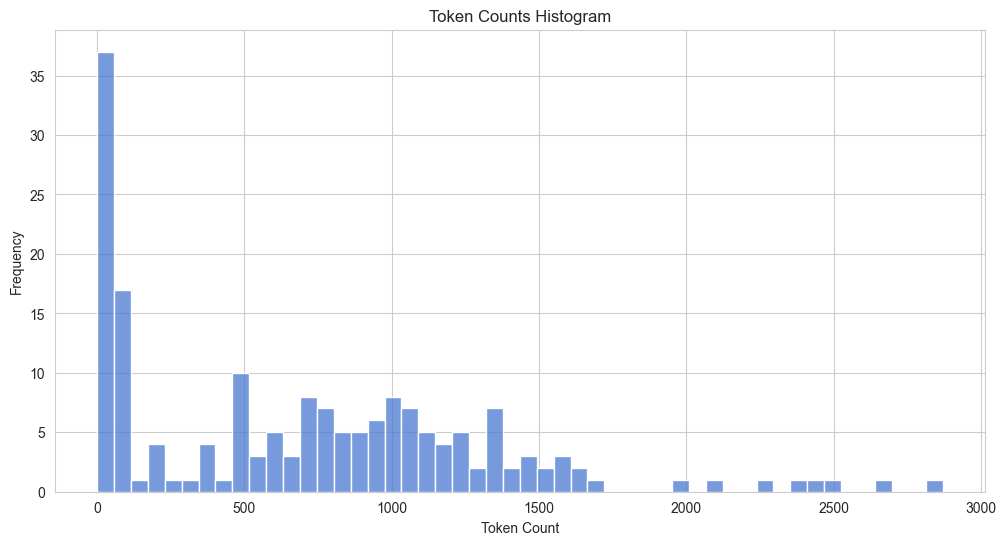

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("muted")

plt.figure(figsize=(12, 6))
sns.histplot(token_counts, kde=False, bins=50)

plt.title("Token Counts Histogram")
plt.xlabel("Token Count")
plt.ylabel("Frequency")
import tiktoken

tokenizer = tiktoken.get_encoding('cl100k_base')

# create the length function
def tiktoken_len(text):
    tokens = tokenizer.encode(
        text,
        disallowed_special=()
    )
    return len(tokens)
     
plt.show()

La funzione custom_chunker è progettata per dividere un testo in input in una serie di "chunk" (pezzetti di testo), con l'obiettivo di non superare una lunghezza massima specificata per ogni chunk, mantenendo al contempo integre le sezioni di testo identificate come tabelle. Ecco come funziona nei dettagli:

Identificazione delle Tabelle: Utilizza un'espressione regolare (regex) per trovare tutte le parti del testo che corrispondono al pattern di una tabella, identificate da marcatori specifici (<start_table\d+> e <end_table\d+>). Questi marcatori indicano l'inizio e la fine di una tabella e includono un numero che identifica la tabella in modo univoco.

Divisione del Testo: La funzione procede poi a dividere il testo in parti più piccole. Fa ciò iterando attraverso il testo e aggiungendo pezzi di testo a un "chunk" corrente finché la lunghezza di questo chunk non supera il limite massimo specificato (max_length).

Testo Precedente la Tabella: Per ogni tabella identificata, la funzione aggiunge al chunk corrente il testo che precede la tabella (se presente) fino a quando non viene raggiunta la lunghezza massima del chunk. Se l'aggiunta di una nuova parte di testo supererebbe questo limite, il chunk corrente viene salvato nell'elenco dei chunk, e inizia a controllare un nuovo chunk con il testo residuo.

Inserimento delle Tabelle: Quando si arriva a una tabella, la funzione controlla se la tabella intera può essere inserita nel chunk corrente senza superare il limite di lunghezza. Se sì, la tabella viene aggiunta al chunk corrente. Se no, e il chunk corrente contiene già del testo, questo viene salvato come un chunk finito, e la tabella viene inserita in un nuovo chunk da sola, assicurando che la tabella rimanga intatta.

Testo Successivo l'Ultima Tabella: Dopo aver processato tutte le tabelle, la funzione gestisce qualsiasi testo rimanente seguendo la stessa logica utilizzata per il testo precedente le tabelle.

Salvataggio dell'Ultimo Chunk: Se, dopo aver processato tutto il testo, rimane un chunk non vuoto, questo viene aggiunto all'elenco dei chunk finiti.

In conclusione, custom_chunker divide il testo in chunk di una lunghezza specificata, preservando le tabelle come unità indivisibili. Questo è particolarmente utile quando si lavora con documenti che contengono sia testo libero sia dati strutturati (come tabelle) e si desidera mantenere la struttura delle tabelle intatta per l'analisi successiva o per la visualizzazione.

In [18]:
import re

def custom_chunker(text, max_length=1024):
    # Pattern per identificare le tabelle
    table_pattern = re.compile(r'<start_table\d+>.*?<end_table\d+>', re.DOTALL)
    
    text_chunks = [] 
    current_chunk = ""
    
    # Trova tutte le tabelle nel testo
    tables = table_pattern.findall(text)

    table_positions = [(m.start(0), m.end(0)) for m in table_pattern.finditer(text)]
    
    last_pos = 0
    for start, end in table_positions:
        # Aggiungi il testo prima della tabella al chunk corrente
        pre_table_text = text[last_pos:start]
        for part in pre_table_text.split(" "):
            if len(current_chunk) + len(part) + 1 <= max_length:
                current_chunk += (part + " ")
            else:
                text_chunks.append(current_chunk.strip())  # Uso di "text_chunks" al posto di "chunks"
                current_chunk = part + " "
        
        # Aggiungi la tabella intera al chunk corrente o in uno nuovo
        table_text = text[start:end]
        if len(current_chunk) + len(table_text) <= max_length:
            current_chunk += table_text
        else:
            if current_chunk:  # Se il chunk corrente contiene del testo, lo salviamo
                text_chunks.append(current_chunk.strip())  
            text_chunks.append(table_text)  # Salviamo la tabella in un nuovo chunk
            current_chunk = ""  # Resettiamo il chunk corrente
        
        last_pos = end  # Aggiorniamo la posizione dell'ultimo carattere processato
    
    # Aggiungi eventuali parti di testo rimanenti dopo l'ultima tabella
    remaining_text = text[last_pos:]
    for part in remaining_text.split(" "):
        if len(current_chunk) + len(part) + 1 <= max_length:
            current_chunk += (part + " ")
        else:
            text_chunks.append(current_chunk.strip()) 
            current_chunk = part + " "
    
    if current_chunk:  # Aggiungi l'ultimo chunk se non è vuoto
        text_chunks.append(current_chunk.strip())  
    
    return text_chunks


In [29]:
print(len(chunks[0]))

77


In [28]:
chunks_splitted = []

for chunk in chunks:
    for text in chunk:
        print(f'text unsplitted : {text}')
        chunk_splitted = custom_chunker(text)
        print(len(chunk_splitted))
        if len(chunk_splitted) > 1:
            print(f'lunghezza {len(chunk_splitted[0])} text splitted : {chunk_splitted}')
        #print(f"Chunk di lunghezza {len(chunk)}: {chunk}\n---")
        chunks_splitted.append(chunk_splitted)

text unsplitted : Llama 2: Open Foundation and Fine-Tuned Chat Models Hugo Touvron∗ Louis Martin† Kevin Stone† Peter Albert Amjad Almahairi Yasmine Babaei Nikolay Bashlykov Soumya Batra Prajjwal Bhargava Shruti Bhosale Dan Bikel Lukas Blecher Cristian Canton Ferrer Moya Chen Guillem Cucurull David Esiobu Jude Fernandes Jeremy Fu Wenyin Fu Brian Fuller Cynthia Gao Vedanuj Goswami Naman Goyal Anthony Hartshorn Saghar Hosseini Rui Hou Hakan Inan Marcin Kardas Viktor Kerkez Madian Khabsa Isabel Kloumann Artem Korenev Punit Singh Koura Marie-Anne Lachaux Thibaut Lavril Jenya Lee Diana Liskovich Yinghai Lu Yuning Mao Xavier Martinet Todor Mihaylov Pushkar Mishra Igor Molybog Yixin Nie Andrew Poulton Jeremy Reizenstein Rashi Rungta Kalyan Saladi Alan Schelten Ruan Silva Eric Michael Smith Ranjan Subramanian Xiaoqing Ellen Tan Binh Tang Ross Taylor Adina Williams Jian Xiang Kuan Puxin Xu Zheng Yan Iliyan Zarov Yuchen Zhang Angela Fan Melanie Kambadur Sharan Narang Aurelien Rodriguez Robert Sto

In [33]:
chunks_splitted = []

for chunk in chunks:
    for text in chunk:
        print(f'text unsplitted : {text}')
        chunk_splitted = custom_chunker(text)
        print(len(chunk_splitted))
        if len(chunk_splitted) > 1:
            print(f'lunghezza {len(chunk_splitted[0])} text splitted : {chunk_splitted}')
        chunks_splitted.extend(chunk_splitted)


text unsplitted : Llama 2: Open Foundation and Fine-Tuned Chat Models Hugo Touvron∗ Louis Martin† Kevin Stone† Peter Albert Amjad Almahairi Yasmine Babaei Nikolay Bashlykov Soumya Batra Prajjwal Bhargava Shruti Bhosale Dan Bikel Lukas Blecher Cristian Canton Ferrer Moya Chen Guillem Cucurull David Esiobu Jude Fernandes Jeremy Fu Wenyin Fu Brian Fuller Cynthia Gao Vedanuj Goswami Naman Goyal Anthony Hartshorn Saghar Hosseini Rui Hou Hakan Inan Marcin Kardas Viktor Kerkez Madian Khabsa Isabel Kloumann Artem Korenev Punit Singh Koura Marie-Anne Lachaux Thibaut Lavril Jenya Lee Diana Liskovich Yinghai Lu Yuning Mao Xavier Martinet Todor Mihaylov Pushkar Mishra Igor Molybog Yixin Nie Andrew Poulton Jeremy Reizenstein Rashi Rungta Kalyan Saladi Alan Schelten Ruan Silva Eric Michael Smith Ranjan Subramanian Xiaoqing Ellen Tan Binh Tang Ross Taylor Adina Williams Jian Xiang Kuan Puxin Xu Zheng Yan Iliyan Zarov Yuchen Zhang Angela Fan Melanie Kambadur Sharan Narang Aurelien Rodriguez Robert Sto

In [34]:
print(len(chunks_splitted))

542


In [35]:
chunks_splitted

['Llama 2: Open Foundation and Fine-Tuned Chat Models Hugo Touvron∗ Louis Martin† Kevin Stone† Peter Albert Amjad Almahairi Yasmine Babaei Nikolay Bashlykov Soumya Batra Prajjwal Bhargava Shruti Bhosale Dan Bikel Lukas Blecher Cristian Canton Ferrer Moya Chen Guillem Cucurull David Esiobu Jude Fernandes Jeremy Fu Wenyin Fu Brian Fuller Cynthia Gao Vedanuj Goswami Naman Goyal Anthony Hartshorn Saghar Hosseini Rui Hou Hakan Inan Marcin Kardas Viktor Kerkez Madian Khabsa Isabel Kloumann Artem Korenev Punit Singh Koura Marie-Anne Lachaux Thibaut Lavril Jenya Lee Diana Liskovich Yinghai Lu Yuning Mao Xavier Martinet Todor Mihaylov Pushkar Mishra Igor Molybog Yixin Nie Andrew Poulton Jeremy Reizenstein Rashi Rungta Kalyan Saladi Alan Schelten Ruan Silva Eric Michael Smith Ranjan Subramanian Xiaoqing Ellen Tan Binh Tang Ross Taylor Adina Williams Jian Xiang Kuan Puxin Xu Zheng Yan Iliyan Zarov Yuchen Zhang Angela Fan Melanie Kambadur Sharan Narang Aurelien Rodriguez Robert Stojnic Sergey Edun

In [12]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 2.8 MB/s eta 0:00:00a 0:00:01


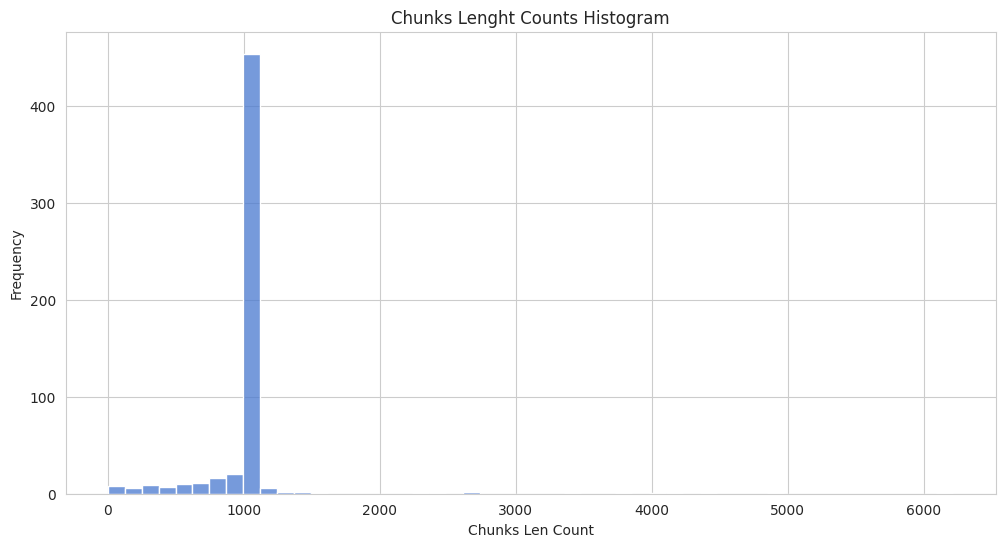

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

len_chunks_counts = [len(t.text) for t in text]

sns.set_style("whitegrid")
sns.set_palette("muted")

plt.figure(figsize=(12, 6))
sns.histplot(len_chunks_counts, kde=False, bins=50)

plt.title("Chunks Lenght Counts Histogram")
plt.xlabel("Chunks Len Count")
plt.ylabel("Frequency")
     
plt.show()

#Build Retrieval Piperline from Scratch

In [30]:
query_str = " Per accedere all’agevolazione prevista nell’Avviso"

In [31]:
query_embedding = embed_model.get_query_embedding(query_str)

In [32]:
# construct vector store query
from llama_index.core.vector_stores import VectorStoreQuery

#query_mode = "default"
# query_mode = "sparse"
query_mode = "default"

vector_store_query = VectorStoreQuery(
    query_embedding=query_embedding, similarity_top_k=3, mode=query_mode,
)

In [33]:
# returns a VectorStoreQueryResult
query_result = vector_store.query(vector_store_query)
print(query_result.nodes[1].get_content())

<start_table1>| Domanda | Risposta | |:---------------------------|:----------------------------------------------------------| | Quali sono i requisiti | Per accedere all’agevolazione prevista nell’Avviso i | | necessari per accedere | requisiti necessari sono: età massima dell’impresa al | | all’agevolazione prevista | momento della presentazione della domanda di | | nell’Avviso? | agevolazione pari a 10 anni per le nuove imprese e/o | | | quelle nate da ristrutturazioni o trasformazioni | | | societarie... | | Qual è la durata | Le agevolazioni sono erogate in conto interessi con un | | dell’agevolazione una | tasso fisso pari al 0.25% annuo. Il rimborso delle stesse | | volta ottenuta? | avviene in un’unica soluzione alla scadenza del | | | finanziamento (anno 5)... | | C’è una scadenza per | Sì, la scadenza è il 30 giugno 2016. Per prese... | | presentare la domanda di | | | ... | | | Quali sono i criteri di | I criteri di valutazione utilizzati per selezi... | | valutazione utili

In [34]:
print(query_result.nodes[0].get_content())

7.6. Evaluations 47 costo aggiuntivo di 3$. Tali costi sono stati effettuati con la speranza di ottenere risposte di miglior qualità. 7.6.3 Fine-Tuning di GPT-3.5 Turbo Per eseguire il fine-tuning di GPT-3.5 Turbo, è stato necessario convertire il dataset pre- cedente nel formato JSONL, strutturato con {"prompt":" "} e {"completion": " "} in un JSONL più complesso in modo da adattarsi alle specifiche di GPT-3.5 Turbo. Il formato richiesto è organizzato come una lista di messages, come mostrato nell’esempio seguente: 1 { 2 "messages ": [ 3 {" role ": "system", "content ": "You are a helpful assistant ."}, 4 {" role ": "user", "content ": "Quale documentazione necessaria per la presentazione della domanda di agevolazione? in riferimento al documento: ’Scheda MicroPrestito della Regione Puglia - edizione 2021. pdf ’"}, 5 {" role ": "assistant", "content ": "Per presentare la domanda di agevolazione , necessario produrre i seguenti documenti: - Domanda di agevolazione firmata digitalmente 

In [29]:
print(query_result.nodes[2].get_content())

29 Capitolo 6 Scelta del giusto approccio per l’applicazione Dopo aver esaminato i quattro approcci all’adattamento dei Large Language Model(LLM), confrontiamoli su tre metriche importanti: complessità, costo e accuratezza. 6.1 Costo Nel valutare il costo di un approccio, ha senso prendere in considerazione il costo della sua implementazione iniziale, insieme al costo di mantenimento della soluzione. Dato ciò, confrontiamo i costi dei quattro approcci. 6.1.1 Prompt-Engineering L’ingegneria delle istruzioni ha il costo più basso tra i quattro approcci. Si riduce alla scrittura e al test di prompt per trovare quelli che danno buoni risultati quando alimen- tati al LLM preaddestrato. Potrebbe anche implicare l’aggiornamento dei prompt se il modello preaddestrato viene periodicamente aggiornato o sostituito, ad esempio con un modello commerciale come il GPT-4 di OpenAI. 6.1.2 RAG Il costo di implementazione di RAG potrebbe essere superiore a quello del prompt- engineering. Ciò è dovuto all

In [22]:
print(query_result.nodes[2].get_content())

epoche, aumentando tuttavia il costo del Fine- Tuning dovuto al numero maggiore di tokens allenati. Anche GPT-3.5-Turbo a 4 epoche evidenzia una leggera previsione più accurata sul modello sempre con 4 epoche.


In [16]:
query_result

VectorStoreQueryResult(nodes=[TextNode(id_='fbb8fd90-778f-4ab0-929c-60aaf8f0429b', embedding=None, metadata={}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, text='2.3. Fine-Tuning di ChatGPT: Ottimizzazione dei Modelli OpenAI 15 Il Fine-Tuning migliora il few-shot learning addestrando il modello su un numero maggiore di esempi, consentendo risultati migliori su un’ampia gamma di compiti. Una volta completato il Fine-Tuning, il numero di esempi richiesti nei prompt diminuisce, riducendo i costi e consentendo richieste con latenza inferiore. 2.3.1 Fasi del Fine-Tuning A livello pratico, il processo di Fine-Tuning coinvolge le seguenti fasi: 1. Preparazione e upload dei dati di addestramento 2. Addestramento di un nuovo modello fine-tuned 3. Valutazione dei risultati e, se necessario, ritorno alla fase 1 4. Utilizzo del modello fine-tuned 2.3.2 Modelli Abilitati per il Fine-Tuning Attualmente, il Fine-Tuning è disponibile per modelli specifici, tra cui

In [35]:
query_result.similarities

[0.40815529400473977, 0.3965979054979767, 0.3851330299812268]

In [ ]:
from llama_index.core.schema import NodeWithScore
from typing import Optional

nodes_with_scores = []
for index, node in enumerate(query_result.nodes):
    score: Optional[float] = None
    if query_result.similarities is not None:
        score = query_result.similarities[index]
    nodes_with_scores.append(NodeWithScore(node=node, score=score))

In [8]:
import src.chunk_splitter as chunk_splitter

documents,tables_md = chunk_splitter.get_documents(path = "./testdoc",max_len=1024)

Tesi_Giacomo_Signorile (8).pdf


The checkpoint state_dict contains keys that are not used by the model:
  pixel_mean
  pixel_std
/home/giac/RAG-with-LLamaIndex-Open/py310/lib/python3.10/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


1
no tables
2
no tables
3
no tables
4
no tables
5
no tables
6
no tables
7
no tables
8
no tables
9
no tables
10
no tables
11
no tables
12
no tables
13
no tables
14
no tables
15
no tables
16
no tables
17
no tables
18
no tables
19
no tables
20
no tables
21
no tables
22
no tables
23
no tables
24
no tables
25
no tables
26
no tables
27
no tables
28
no tables
29
no tables
30
no tables
31
no tables
32
no tables
33
no tables
34
no tables
35
no tables
36
no tables
37
no tables
38
no tables
39
no tables
40
no tables
41
no tables
42
no tables
43
no tables
44
no tables
45
no tables
46
no tables
47
no tables
48
no tables
49
no tables
50
no tables
51


Mar 05, 2024 5:45:20 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Mar 05, 2024 5:45:20 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Mar 05, 2024 5:45:20 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Mar 05, 2024 5:45:20 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Mar 05, 2024 5:45:20 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Mar 05, 2024 5:45:20 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Mar 05, 2024 5:45:20 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Mar 05, 2024 5:45:20 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Mar 05, 2024 5:45:20 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Mar 05, 2024 5:45:20 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Mar 05, 2024 5:45:20 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Mar 05, 2024 5:45:20 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Mar 05, 2024 5:45:20 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Mar 05, 2024 5:45:20 PM org.apache.pdf

52
53
no tables
54
no tables
55
56
no tables
57
no tables
58
no tables
59
no tables
60
no tables
61
no tables
62
no tables
63
no tables
64
no tables
65
no tables
66
no tables
67
no tables
68
no tables
69
no tables
70
no tables
71
no tables
72
no tables
1
1
3
length : 1022 text splitted : ['III Indice Elenco delle figure VII Elenco delle tabelle IX Introduzione 1 1 Introduzione ai Large Language Models (LLMs) 3 1.1 Breve Storia e Evoluzione degli LLM . . . . . . . . . . . . . . . . . . . . . . 3 1.2 Caratteristiche principali degli LLMs . . . . . . . . . . . . . . . . . . . . . . 4 1.2.1 Tokenizzazione . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 5 1.3 Architettura . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 5 1.3.1 Meccanismi di Attention . . . . . . . . . . . . . . . . . . . . . . . . . 6 1.4 Implicazioni e Applicazioni . . . . . . . . . . . . . . . . . . . . . . . . . . . 7 1.5 LLMs vs Chat Model vs Embedding Models . . . . . . . . . . . . .

The checkpoint state_dict contains keys that are not used by the model:
  pixel_mean
  pixel_std


1
no tables
2
no tables
3
no tables
4
no tables
5
6
no tables
7
no tables
8
no tables
9
no tables
3
length : 1020 text splitted : ['Fauno: The Italian Large Language Model that will leave you senza parole! Andrea Bacciu1, Giovanni Trappolini1, Andrea Santilli2, Emanuele Rodolà2 and Fabrizio Silvestri1 1Sapienza University - Department of Computer, Control and Management Engineering 2Sapienza University - Computer Science Department Abstract This paper presents Fauno, the first and largest open-source Italian conversational Large Language Model (LLM). Our goal with Fauno is to democratize the study of LLMs in Italian, demonstrating that obtaining a fine-tuned conversational bot with a single GPU is possible. In addition, we release a collection of datasets for conversational AI in Italian. The datasets on which we fine-tuned Fauno include various topics such as general question answering, computer science, and medical questions. We release our code and datasets on https://github.com/RST

In [11]:
from llama_index.core.node_parser import MarkdownElementNodeParser
import nest_asyncio
nest_asyncio.apply()

node_parser = MarkdownElementNodeParser()

In [ ]:
nodes = node_parser.get_nodes_from_documents(documents)

In [14]:
from src import embeddings as embeddings
embed_model = embeddings.getEmbeddingmodel()

nodes = embeddings.createEmbeddings(nodes, embed_model)

In [15]:
nodes

[TextNode(id_='d8840f83-2257-4d3a-9b7b-2954cdfa36fc', embedding=[0.015948636457324028, -0.07010190933942795, -0.015235980972647667, 0.011135419830679893, -0.063134104013443, 0.008240427821874619, 0.007953413762152195, -0.005741801578551531, -0.015988804399967194, 0.05513786897063255, -0.027215737849473953, -0.03339307755231857, -0.011520922183990479, 0.01100076176226139, 0.017058538272976875, -0.017948254942893982, 0.05940687656402588, -0.015549668110907078, -0.026930931955575943, -0.020592356100678444, 0.0180113036185503, 0.002421541139483452, 0.017015157267451286, 0.07898835092782974, -0.021074337884783745, 0.044428516179323196, 0.007643178571015596, -0.0013174490304663777, -0.004373109433799982, 0.0077346134930849075, 0.0007991630118340254, 0.05394421145319939, 0.008595398627221584, -0.020652087405323982, 0.05374418571591377, 0.007104315795004368, 0.009313371963799, 0.018433736637234688, 0.04662095010280609, -0.004755544941872358, -0.006865437142550945, -0.0048189531080424786, 0.038

In [1]:
from src import vector_stores as vector_stores

vector_store = vector_stores.setupChromaDB()

ModuleNotFoundError: No module named 'rag_open_source'

In [18]:
query = "Fine-tuning"

vector_store_query = rag_open_source.VectorDBRetriever.VectorStoreQuery(
    query=query, similarity_top_k=3, query_modes= default
)
# returns a VectorStoreQueryResult
query_result = vector_store.query(vector_store_query)
print(query_result.nodes[0].get_content())

In [20]:
vector_store_query = rag_open_source.VectorDBRetriever.VectorStoreQuery(
    query=query, similarity_top_k=3, query_modes= default
)

In [21]:
# returns a VectorStoreQueryResult
query_result = vector_store.query(vector_store_query)
print(query_result.nodes[0].get_content())

2.3. Fine-Tuning di ChatGPT: Ottimizzazione dei Modelli OpenAI 15 Il Fine-Tuning migliora il few-shot learning addestrando il modello su un numero maggiore di esempi, consentendo risultati migliori su un’ampia gamma di compiti. Una volta completato il Fine-Tuning, il numero di esempi richiesti nei prompt diminuisce, riducendo i costi e consentendo richieste con latenza inferiore. 2.3.1 Fasi del Fine-Tuning A livello pratico, il processo di Fine-Tuning coinvolge le seguenti fasi: 1. Preparazione e upload dei dati di addestramento 2. Addestramento di un nuovo modello fine-tuned 3. Valutazione dei risultati e, se necessario, ritorno alla fase 1 4. Utilizzo del modello fine-tuned 2.3.2 Modelli Abilitati per il Fine-Tuning Attualmente, il Fine-Tuning è disponibile per modelli specifici, tra cui: • gpt-3.5-turbo-1106 (raccomandato) • gpt-3.5-turbo-0613 • babbage-002 • davinci-002 • gpt-4-0613 (sperimentale) GPT-3.5-turbo è generalmente consigliato per la maggior parte degli utenti in termini

In [5]:
from src import llm_loader

model_url = None
model_path = "./model/mistral-Ita-7b-q4_k_m.gguf"
llm = llm_loader.getLlamaLLM(model_path, model_url)

llama_model_loader: loaded meta data with 20 key-value pairs and 291 tensors from ./model/mistral-Ita-7b-q4_k_m.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = mistral
llama_model_loader: - kv   2:                       llama.context_length u32              = 32768
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 14336
llama_model_loader: - kv   6:                 llama.rope.dimension_count u32              = 128
llama_model_loader: - kv   7:                 llama.attention.head_count u32

In [6]:
response_iter = llm.stream_complete("Cosa sai della Scuderia Ferrari?")
for response in response_iter:
    print(response.delta, end="", flush=True)



La Scuderia Ferrari è un'azienda italiana che produce auto sportive e motori per Formula 1. È stata fondata nel 1923 da Enzo Ferrari ed è attualmente di proprietà del Gruppo Fiat Chrysler Automobiles. La Scuderia Ferrari ha vinto 15 titoli mondiali di Formula 1, più di qualsiasi altra squadra. Produce anche auto stradali, come la Ferrari F8 Tributo, la Ferrari SF90 Stradale e la Ferrari Monza SP2. La Scuderia Ferrari ha anche una divisione di corse, che ha vinto numerosi titoli mondiali in vari campionati, tra cui il Campionato Mondiale Endurance FIA.


llama_print_timings:        load time =    1425.92 ms
llama_print_timings:      sample time =      36.57 ms /   176 runs   (    0.21 ms per token,  4813.21 tokens per second)
llama_print_timings: prompt eval time =    1425.75 ms /    12 tokens (  118.81 ms per token,     8.42 tokens per second)
llama_print_timings:        eval time =   50138.54 ms /   175 runs   (  286.51 ms per token,     3.49 tokens per second)
llama_print_timings:       total time =   52043.82 ms /   187 tokens


In [31]:
from llama_index.core.query_engine import RetrieverQueryEngine

query_engine = RetrieverQueryEngine.from_args(retriever, llm=llm, streaming=True)

In [32]:
query_str = "Come si esegue il fine-tuning di Davinci-002 fine-tuned con 4 epoche?"

response = query_engine.query(query_str)

In [33]:
print(str(response))

Llama.generate: prefix-match hit

llama_print_timings:        load time =    1425.92 ms
llama_print_timings:      sample time =      61.17 ms /   256 runs   (    0.24 ms per token,  4184.78 tokens per second)
llama_print_timings: prompt eval time =   82446.00 ms /   853 tokens (   96.65 ms per token,    10.35 tokens per second)
llama_print_timings:        eval time =   69507.79 ms /   255 runs   (  272.58 ms per token,     3.67 tokens per second)
llama_print_timings:       total time =  152604.87 ms /  1108 tokens


1. Raccogliere i dati per il modello Davinci-002 fine-tuned con 4 epoche. 2. Preelaborare i dati per il modello Davinci-002 fine-tuned con 4 epoche. 3. Allenare il modello Davinci-002 fine-tuned con 4 epoche. 4. Valutare le prestazioni del modello Davinci-002 fine-tuned con 4 epoche. 5. Ottimizzare i parametri del modello Davinci-002 fine-tuned con 4 epoche. 6. Monitorare le prestazioni del modello Davinci-002 fine-tuned con 4 epoche. 7. Generare risposte utilizzando il modello Davinci-002 fine-tuned con 4 epoche. 8. Misurare le prestazioni del modello Davinci-002 fine-tuned con 4 epoche. 9. Raccogliere i dati per il
